# Install dan Dowload Dataset Kaggle

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!kaggle dataset kernels output jadwigaszkatua/predicting-the-risk-of-death-after-a-df-python -p /path/to/dest

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat '/content/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dedylesmana","key":"78cc232e7c2a7464af4a035f7ec9c946"}'}

In [ ]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Oct 14 17:54 kaggle.json


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# List available datasets.
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-10 17:55:57          13705  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8239  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3670  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women                               838MB  2021-02-28 14:56:00           1583  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

# Import Library 

In [ ]:
import pandas as pd
import io
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
import numpy as np
from sklearn import metrics
np.random.seed(122)

# Deskriptif Statistic

In [ ]:
from google.colab import files
df = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [ ]:
df
df = pd.read_csv(io.StringIO(df['healthcare-dataset-df-data.csv'].decode('utf-8')))
print(df)

         id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Visualization

In [ ]:
print(df.describe())

                 id          age  ...          bmi       stroke
count   5110.000000  5110.000000  ...  4909.000000  5110.000000
mean   36517.829354    43.226614  ...    28.893237     0.048728
std    21161.721625    22.612647  ...     7.854067     0.215320
min       67.000000     0.080000  ...    10.300000     0.000000
25%    17741.250000    25.000000  ...    23.500000     0.000000
50%    36932.000000    45.000000  ...    28.100000     0.000000
75%    54682.000000    61.000000  ...    33.100000     0.000000
max    72940.000000    82.000000  ...    97.600000     1.000000

[8 rows x 7 columns]


In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [ ]:
df['id'].sum()


186606108

In [ ]:
len(df)-df['id'].sum()


-186600998

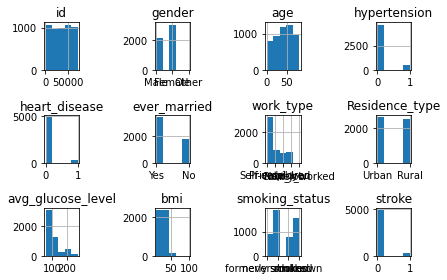

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows, n_cols,i+1)
        df[var_name].hist(bins=5, ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 3, 4)

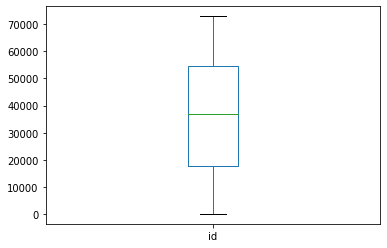

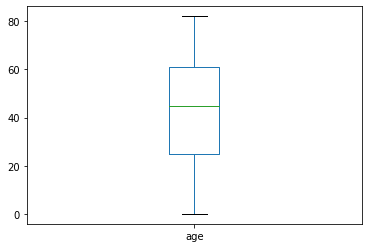

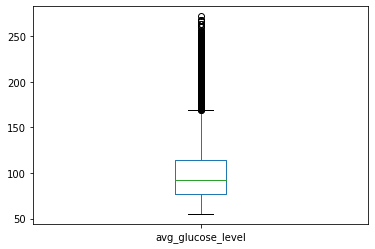

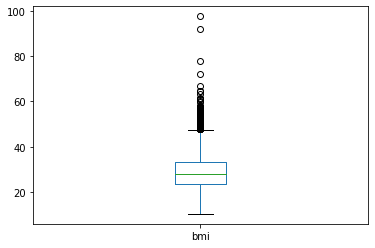

In [ ]:
for column_name in ['id', 'age', 'avg_glucose_level', 'bmi'] :
    plt.figure()
    df[column_name].plot(kind='box')
    plt.show()

In [ ]:
hd = pd.read_csv("healthcare-dataset-stroke-data.csv", sep=",")


In [ ]:
!pip uninstall scikit-learn
!!pip install scikit-learn==0.19.1

Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-0.22.2.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-0.22.2.post1


['Collecting scikit-learn==0.19.1',
 '  Using cached scikit-learn-0.19.1.tar.gz (9.5 MB)',
 'Building wheels for collected packages: scikit-learn',
 '  Building wheel for scikit-learn (setup.py) ... \x1b[?25lerror',
 '\x1b  ERROR: Failed building wheel for scikit-learn\x1b',
 '\x1b[?25h  Running setup.py clean for scikit-learn',
 'Failed to build scikit-learn',
 'Installing collected packages: scikit-learn',
 '    Running setup.py install for scikit-learn ... \x1b[?25l\x1b[?25herror',
 '\x1bERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c \'import io, os, sys, setuptools, tokenize; sys.argv[0] = \'"\'"\'/tmp/pip-install-2k9lrnzp/scikit-learn_c157f16ce37440149f2e35d4811762fe/setup.py\'"\'"\'; __file__=\'"\'"\'/tmp/pip-install-2k9lrnzp/scikit-learn_c157f16ce37440149f2e35d4811762fe/setup.py\'"\'"\';f = getattr(tokenize, \'"\'"\'open\'"\'"\', open)(__file__) if os.path.exists(__file__) else io.StringIO(\'"\'"\'from setuptools import setup; setup()\'"\'"\');code = f.rea

In [ ]:
stroke = pd.read_csv('healthcare-dataset-stroke-data (1).csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

In [144]:
#Delete Id
stroke_data = pd.read_csv('healthcare-dataset-stroke-data (1).csv')
print('Data shape: ', stroke_data.shape)
stroke_data.drop(columns='id',inplace=True)
stroke_data.head()

Data shape:  (5110, 12)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Target Analysis

In [145]:
#checking the number of missing values and unique values in target column
print('Number of missing values: {}'.format(stroke_data.stroke.isnull().sum()))
stroke_data.stroke.value_counts()

Number of missing values: 0


0    4861
1     249
Name: stroke, dtype: int64

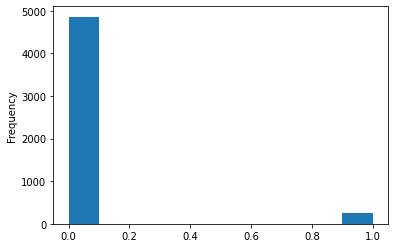

In [146]:
stroke_data.stroke.plot.hist();

# Missing Value

In [147]:
def missing_values_table(df):
        
        mis_val = df.isnull().sum()                                   # Total missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)           # Percentage of missing values
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) # Make a table with the results
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})    # Rename the columns
        
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[        # Sort the table by percentage of missing descending
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        return mis_val_table_ren_columns
    
missing_values = missing_values_table(stroke_data)
missing_values.head(20)

Your selected dataframe has 11 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
bmi,201,3.9


In [148]:
stroke_data['missing_bmi'] = np.where(stroke_data.bmi.isna(),1,0)
bmi_median = stroke_data.bmi.median()
stroke_data['bmi'] = np.where(stroke_data.bmi.isna(),bmi_median,stroke_data.bmi)
print('avg:       {},\nstroke:    {} +- {}, \nno_stroke: {} +- {}'.format(round(stroke_data.bmi.mean(),1),
                                                             round(stroke_data[stroke_data.stroke==1].bmi.mean(),1),
                                                             round(stroke_data[stroke_data.stroke==1].bmi.std(),1),
                                                             round(stroke_data[stroke_data.stroke==0].bmi.mean(),1),
                                                             round(stroke_data[stroke_data.stroke==1].bmi.std(),1),
               )
     )

avg:       28.9,
stroke:    30.1 +- 5.9, 
no_stroke: 28.8 +- 5.9


In [149]:
stroke_data = pd.get_dummies(stroke_data)
stroke_data.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,missing_bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.1,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


# Train Test Split

In [151]:
from sklearn.model_selection import train_test_split
X, y = stroke_data.drop('stroke', axis=1), stroke_data['stroke']
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
stroke_data.head()

(5110, 22) (5110,)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,missing_bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.1,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train=scaler.transform(X_train)
scaler.fit(X_test)
X_test=scaler.transform(X_test)

In [153]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict_proba(X_test)[:, 1]
rounded_log_reg =  [np.round(x) for x in log_reg_pred]
print('Roc auc score for simple logistic regression is {:.1%}'.format(roc_auc_score(y_test, log_reg_pred)))
print(confusion_matrix(y_test, rounded_log_reg))

Roc auc score for simple logistic regression is 81.0%
[[1450    0]
 [  83    0]]


In [154]:
importance = abs(log_reg.coef_)
importance = 100*importance/(importance.sum())
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x=X.columns,y=abs(importance[0])))
fig.update_layout(title='The Importance Of Features On Our Prediction',xaxis_title='Model',yaxis_title='Weight Percentage')
fig.show()

# Random Forest Model

In [156]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()  # hyperparameter tuning needs to be done later 
random_forest.fit(X_train,y_train)
rd_forest_pred = random_forest.predict_proba(X_test)[:, 1]
rounded_rd_forest =  [np.round(x) for x in rd_forest_pred]
print('Roc auc score for random forest {:.1%}'.format(roc_auc_score(y_test, rd_forest_pred)))
print(confusion_matrix(y_test, rounded_rd_forest))

Roc auc score for random forest 77.3%
[[1445    5]
 [  82    1]]


In [157]:
from xgboost import XGBClassifier
xgb_cls = XGBClassifier(scale_pos_weight=1/y_test.mean(),#scale_pos_weight class ratio negativee to positive
                       early_stopping_rounds=2,
                       colsample_bytree= 0.1,
                       max_depth = 4) 
xgb_cls.fit(X_train, y_train)
 
XGB_pred = xgb_cls.predict_proba(X_test)[:, 1]
rounded_XGB_predt =  [np.round(x) for x in XGB_pred]
print('Roc auc score for XGB {:.1%}'.format(roc_auc_score(y_test, XGB_pred)))
print(confusion_matrix(y_test, rounded_XGB_predt))
print(xgb_cls.get_params())

Roc auc score for XGB 84.8%
[[1184  266]
 [  26   57]]
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 4, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 18.46987951807229, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1, 'early_stopping_rounds': 2}


In [158]:
#print('Roc auc score for log_reg_pred    {:.1%}'.format(roc_auc_score(y_test, log_reg_pred)))
print('Roc auc score for rd_forest_predt {:.1%}'.format(roc_auc_score(y_test, rd_forest_pred)))
print('Roc auc score for XGB_pred        {:.1%}'.format(roc_auc_score(y_test, XGB_pred)))
X, y = stroke_data.drop('stroke', axis=1), stroke_data['stroke']
print(':::: Results on original data ::::')
#print('Roc auc score for log_reg_pred    {:.1%}'.format(roc_auc_score(y_train, log_reg.predict_proba(X_train)[:, 1])))
print('Roc auc score for rd_forest_predt {:.1%}'.format(roc_auc_score(y_train, random_forest.predict_proba(X_train)[:, 1])))
print('Roc auc score for XGB_pred        {:.1%}'.format(roc_auc_score(y_train, xgb_cls.predict_proba(X_train)[:, 1])))

Roc auc score for rd_forest_predt 77.3%
Roc auc score for XGB_pred        84.8%
:::: Results on original data ::::
Roc auc score for rd_forest_predt 100.0%
Roc auc score for XGB_pred        92.2%


# Decission Trees

In [163]:
clf = DecisionTreeClassifier().fit(X_tr, y_tr)
X_tr.columns=stroke.columns[1:7]

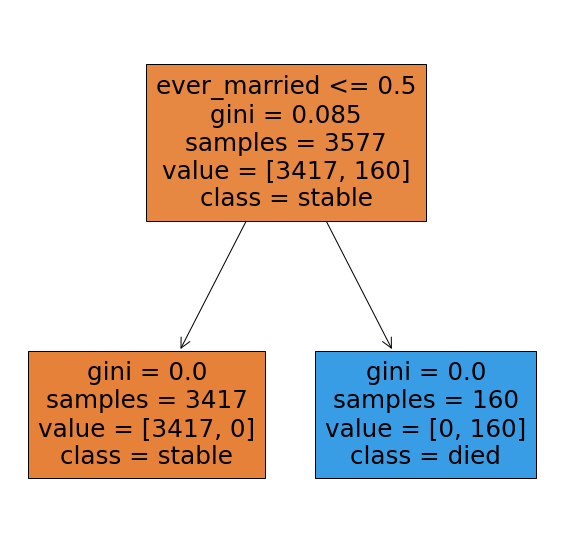

In [165]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=X_tr.columns,class_names=("stable","died"),
                   filled=True)

In [166]:
clf2 = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_tr, y_tr)
X_tr.columns=stroke.columns[1:7]

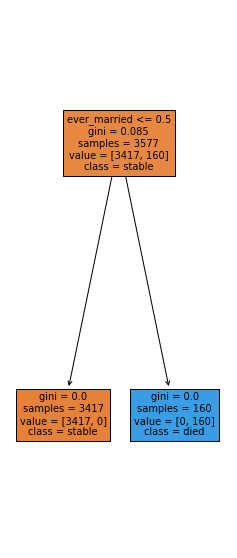

In [168]:
fig = plt.figure(figsize=(4,10))
_ = tree.plot_tree(clf2, feature_names=X_tr.columns,class_names=("stable","died"),
                   filled=True)

In [169]:
y_pred=clf.predict(X_test)
y_test=np.array(y_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[1444    0]
 [   0   89]]


In [170]:
acc=(cnf_matrix[0,0]+cnf_matrix[1,1])/cnf_matrix.sum()
acc

1.0

# Bagging

In [171]:
def bagging(tree_num, X,y,sample_prop, y_test):
    bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=tree_num, max_samples=sample_prop,
                        random_state=33).fit(X,y.values.ravel())
    y_pred=bag.predict(X_test)
    y_test=np.array(y_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    acc=(cnf_matrix[0,0]+cnf_matrix[1,1])/cnf_matrix.sum()
    return acc

In [179]:
df=pd.DataFrame()
for i in range(1,101):
    df=df.append({'Accuracy':bagging(i,X_tr,y_tr,0.5,y_test),'Number of trees': i}, ignore_index=True)
print(df[:5112])   

    Accuracy  Number of trees
0        1.0              1.0
1        1.0              2.0
2        1.0              3.0
3        1.0              4.0
4        1.0              5.0
..       ...              ...
95       1.0             96.0
96       1.0             97.0
97       1.0             98.0
98       1.0             99.0
99       1.0            100.0

[100 rows x 2 columns]


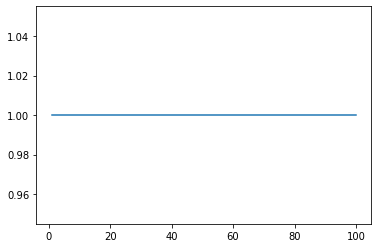

In [178]:
plt.figure()
plt.plot(df['Number of trees'],df['Accuracy'])

In [174]:
df[df['Accuracy']==max(df['Accuracy'])]

,Accuracy,Number of trees
0,1.0,1.0
1,1.0,2.0
2,1.0,3.0
3,1.0,4.0
4,1.0,5.0
...,...,...
95,1.0,96.0
96,1.0,97.0
97,1.0,98.0
98,1.0,99.0


In [176]:
bagging(25,X_tr,y_tr,0.87,y_test)

1.0

In [182]:
!pip help


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                       Show information useful for debugging.
  help                        Show help

# References

1.   https://lh4.googleusercontent.com/G_bEqIti6lEIUxtTnZjKm5v1fSFoozkoZ2PR_LzLV-kV6rmzT0q0VtEoGsgkboXHvDh2ArqZsvH6Y5fhMRithSf6JtWehNKDuKGnj_1KM_n-30CW_wOoGpvjYag3diNDE5qt7P8
2.   https://www.kaggle.com/fedesoriano/df-prediction-dataset
3. https://id.wikipedia.org/wiki/Random_forest
4. https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/
5. https://id.wikipedia.org/wiki/Bootstrap_aggregating
6. https://en.wikipedia.org/wiki/Decision_tree
